In [43]:
import json

# Access JSON file with connection string

with open('G:\\My Drive\\School\\DATA 320\\readonly-credentials.json') as f:
    # Load the JSON data from the file.
    data = json.load(f)

    # Extract the readonly_key from the JSON data.
    readonly_key = data['readonly_key']

# Print a message indicating that the readonly_key was successfully retrieved.
print(f'My Secret key of {len(readonly_key)} length successfully retrieved!')

My Secret key of 71 length successfully retrieved!


In [44]:
import pymongo
import certifi

# Connect to MongoDB Database with secret string.
mongo_connection_string = data['readonly_key']

client = pymongo.MongoClient(mongo_connection_string, tlsCAFile=certifi.where())

da320_database = client['ASSIGNMENT_NOSQL_DATABASES']

allCollections = da320_database.list_collection_names()

# Verify database version and collection.
print(f"Using MongoDB version {client.server_info()['version']}.")
print(f"This database has the collections {allCollections}")


Using MongoDB version 6.0.11.
This database has the collections ['imdb_superhero_2', 'imdb', 'metacritic_movies', 'IMDB', 'IMDB_Pipeline_View']


In [45]:
import pandas as pd

# Retrieve all records from a collection - this can be a large amount of data!
cursor = da320_database["IMDB_Pipeline_View"].find()

# Convert this information into a Pandas dataframe.
imdb_pipeline = pd.DataFrame(cursor)

# Make sure we've read the information correctly.
imdb_pipeline.head()

,_id,title,runtime,user_rating,votes,budget,opening_weekend,gross_sales,release_date,genres,cast,director,producer,company,mpaa_rating,movie_date,slimmedRatings,movie_year,movie_month,movie_day
0,652df3f4e11765e61cda0282,Grease,110.0,7.2,265183,6000000.0,60759.0,394955690.0,1978-06-13,"[Comedy, Musical, Romance]","[John Travolta, Olivia Newton-John, Stockard C...",[Randal Kleiser],"[Allan Carr, Neil A. Machlis, Robert Stigwood]","[Paramount Pictures, Robert Stigwood Organizat...","[TV-14, (D)]",1978-06-13,TV-14,1978,6,13
1,652df3f4e11765e61cda0285,Halloween,91.0,7.7,267109,300000.0,NaN,70000000.0,1978-10-25,"[Horror, Thriller]","[Donald Pleasence, Jamie Lee Curtis, Nancy Kye...",[John Carpenter],"[Moustapha Akkad, John Carpenter, Debra Hill, ...","[Compass International Pictures, Falcon Intern...",[TV-14],1978-10-25,TV-14,1978,10,25
2,652df3f4e11765e61cda0287,"China 9, Liberty 37",102.0,6.0,1212,NaN,NaN,NaN,1978-08-04,"[Romance, Western]","[Warren Oates, Fabio Testi, Jenny Agutter, Sam...","[Monte Hellman, Tony Brandt]","[Gianni Bozzacchi, Valerio De Paolis, Rolf M. ...","[Aspa Producciones, Compagnia Europea Cinemato...",[R],1978-08-04,R,1978,8,4
3,652df3f4e11765e61cda0288,Death on the Nile,140.0,7.2,34243,7920000.0,NaN,784489.0,1978-06-20,"[Crime, Drama, Mystery]","[Peter Ustinov, Jane Birkin, Lois Chiles, Bett...",[John Guillermin],"[John Brabourne, Richard Goodwin, Norton Knatc...","[Mersham Productions Ltd., EMI Films]",[PG],1978-06-20,PG,1978,6,20
4,652df3f4e11765e61cda0286,National Lampoon's Animal House,109.0,7.4,119917,3000000.0,201747.0,3371006.0,1978-07-27,[Comedy],"[Tom Hulce, Stephen Furst, Mark Metcalf, Mary ...",[John Landis],"[Ivan Reitman, Matty Simmons]","[Universal Pictures, Oregon Film Factory, Stag...","[TV-14, (DLSV, TV Rating.)]",1978-07-27,TV-14,1978,7,27


QUERIES AND DATAFRAMES

In [46]:
# Action Movies DF

action_movies_cursor = da320_database["IMDB_Pipeline_View"].find({'genres': {'$in': ['Action']}})
action_movies = pd.DataFrame(action_movies_cursor)

# Comedy Movies DF

comedy_movies_cursor = da320_database["IMDB_Pipeline_View"].find({'genres': {'$in': ['Comedy']}})
comedy_movies = pd.DataFrame(comedy_movies_cursor)

# Drama Movies DF

drama_movies_cursor = da320_database["IMDB_Pipeline_View"].find({'genres': {'$in': ['Drama']}})
drama_movies = pd.DataFrame(drama_movies_cursor)



In [47]:
# Jet Li Movies DF

jetli_movies_cursor = da320_database["IMDB_Pipeline_View"].find({'cast': {'$in': ['Jet Li']}})
jetli_movies = pd.DataFrame(jetli_movies_cursor)

# Jackie Chan Movies DF

jackiechan_movies_cursor = da320_database["IMDB_Pipeline_View"].find({'cast': {'$in': ['Jackie Chan']}})
jackiechan_movies = pd.DataFrame(jackiechan_movies_cursor)

CHARTS

In [48]:
# Import Plot Tools

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly


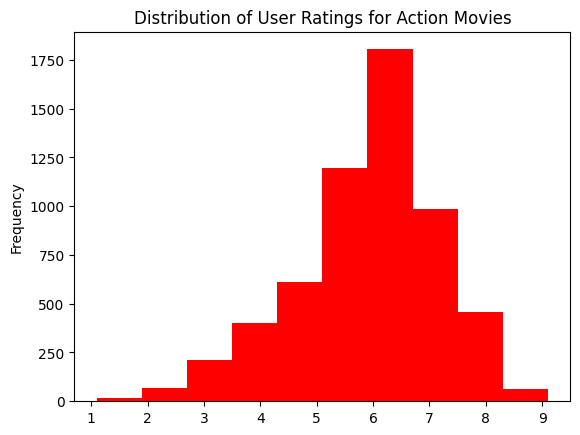

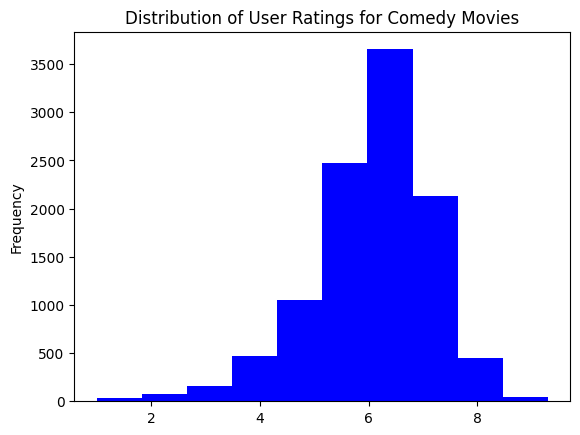

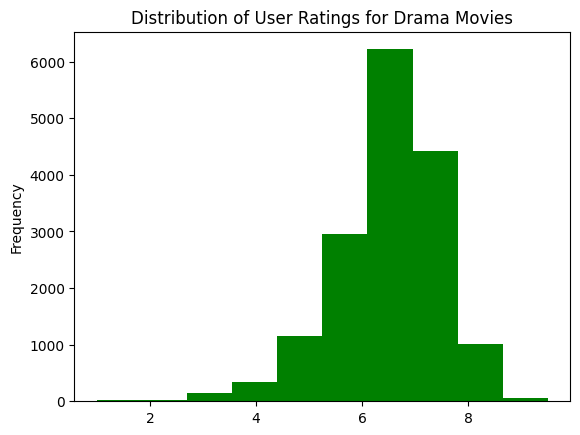

In [49]:
# Distribution of USER RATING for Action, Comedy, and Drama movies

plt.hist(action_movies['user_rating'], color='red', bins = 10)
plt.ylabel('Frequency')
plt.title('Distribution of User Ratings for Action Movies')
plt.show()

plt.hist(comedy_movies['user_rating'], color='blue', bins = 10)
plt.ylabel('Frequency')
plt.title('Distribution of User Ratings for Comedy Movies')
plt.show()

plt.hist(drama_movies['user_rating'], color='green', bins = 10)
plt.ylabel('Frequency')
plt.title('Distribution of User Ratings for Drama Movies')
plt.show()


For the observed movies genres (Action, Comedy, and Drama), chart shows similarities in the distribution with most user ratings concentrated between 5 and 7.50. 

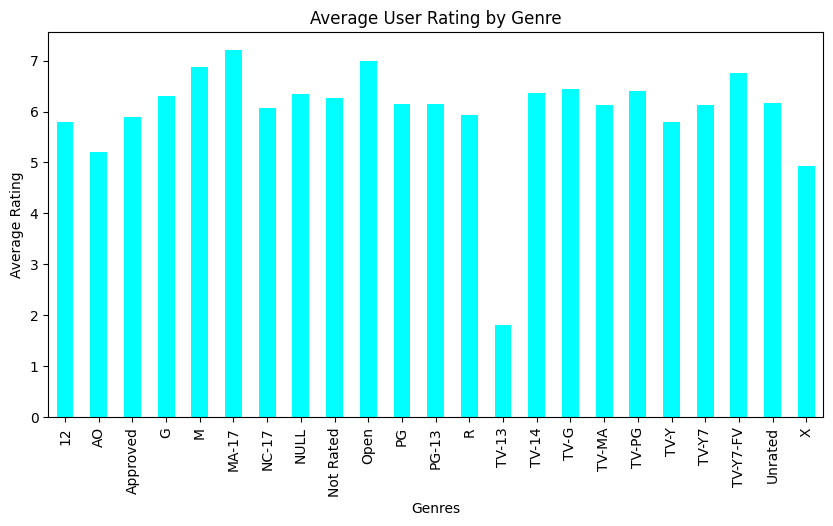

In [50]:
# Chart Showing Avg. User Rating by MPAA Ratings

imdb_pipeline = imdb_pipeline.dropna(subset=['slimmedRatings'])
plot_data = pd.DataFrame(imdb_pipeline[['slimmedRatings', 'user_rating']])
avg_user_rating = plot_data.groupby('slimmedRatings')['user_rating'].mean()

plt.figure(figsize=(10,5))

avg_user_rating.plot(kind='bar', color='cyan')

plt.xlabel('Genres')
plt.ylabel('Average Rating')
plt.title('Average User Rating by Genre')
# Display the chart
plt.show()




This chart provided an unexpected view of the data. Able to visualize all of the mpaa rating after transformation in MongoDB. From here we can see errors in the scrubbed data, for example, "12", "Open", and movies with "NULL" ratings. 

```
[
    {
        '$project': {
            'title': '$title', 
            'runtime': {
                '$convert': {
                    'input': '$runtime', 
                    'to': 'int', 
                    'onError': None
                }
            }, 
            'user_rating': {
                '$convert': {
                    'input': '$user_rating', 
                    'to': 'double', 
                    'onError': None
                }
            }, 
            'votes': {
                '$convert': {
                    'input': '$votes', 
                    'to': 'int', 
                    'onError': None
                }
            }, 
            'budget': {
                '$convert': {
                    'input': '$budget', 
                    'to': 'int', 
                    'onError': None
                }
            }, 
            'opening_weekend': {
                '$convert': {
                    'input': '$opening_weekend', 
                    'to': 'int', 
                    'onError': None
                }
            }, 
            'gross_sales': {
                '$convert': {
                    'input': '$gross_sales', 
                    'to': 'int', 
                    'onError': None
                }
            }, 
            'release_date': {
                '$convert': {
                    'input': '$release_date', 
                    'to': 'date', 
                    'onError': None
                }
            }, 
            'genres': {
                '$split': [
                    '$genres', ', '
                ]
            }, 
            'cast': {
                '$split': [
                    '$cast', ', '
                ]
            }, 
            'director': {
                '$split': [
                    '$director', ', '
                ]
            }, 
            'producer': {
                '$split': [
                    '$producer', ', '
                ]
            }, 
            'company': {
                '$split': [
                    '$company', ', '
                ]
            }, 
            'mpaa_rating': {
                '$split': [
                    '$mpaa_rating', '::'
                ]
            }, 
            'movie_date': {
                '$dateFromString': {
                    'dateString': '$release_date'
                }
            }
        }
    }, {
        '$addFields': {
            'slimmedRatings': {
                '$arrayElemAt': [
                    '$mpaa_rating', 0
                ]
            }, 
            'movie_year': {
                '$year': '$movie_date'
            }, 
            'movie_month': {
                '$month': '$movie_date'
            }, 
            'movie_day': {
                '$dayOfMonth': '$movie_date'
            }
        }
    }
]```